In [1]:
import os
import pandas as pd
from Pyfhel import Pyfhel, PyPtxt, PyCtxt
import numpy as np
import sys
import time
import matplotlib.pyplot as plt

In [2]:
SMF_Weekly_hour = 'weather_hourly_darksky.csv'

colunas_relevantes = ['visibility','temperature','time','pressure','apparentTemperature','windSpeed','precipType','icon','humidity','summary']

In [3]:
df = pd.read_csv(SMF_Weekly_hour)
display(df)

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy
...,...,...,...,...,...,...,...,...,...,...,...,...
21160,12.68,247,7.39,2014-02-15 19:00:00,3.06,997.07,3.91,6.08,rain,partly-cloudy-night,0.74,Partly Cloudy
21161,13.78,249,6.56,2014-02-15 20:00:00,2.76,998.15,3.03,5.61,rain,clear-night,0.77,Clear
21162,14.31,248,6.47,2014-02-15 21:00:00,2.71,999.28,3.06,5.25,rain,clear-night,0.77,Clear
21163,14.31,248,5.96,2014-02-15 22:00:00,2.69,1000.33,2.68,4.69,rain,clear-night,0.80,Clear


In [4]:
df = df.loc[(df['time'] >= '2012-01-01') , colunas_relevantes].copy()
display(df)    

,visibility,temperature,time,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
1464,4.09,10.19,2012-11-25 00:00:00,992.53,10.19,5.62,rain,partly-cloudy-night,0.99,Mostly Cloudy
1465,7.45,11.67,2012-11-25 01:00:00,990.38,11.67,6.70,rain,partly-cloudy-night,0.98,Mostly Cloudy
1466,8.95,12.54,2012-11-25 02:00:00,989.61,12.54,7.97,rain,wind,0.92,Breezy and Mostly Cloudy
1467,13.50,11.39,2012-11-25 03:00:00,992.15,11.39,11.02,rain,wind,0.86,Breezy and Partly Cloudy
1468,13.50,10.26,2012-11-25 04:00:00,994.81,10.26,11.31,rain,wind,0.84,Windy and Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...
21160,12.68,7.39,2014-02-15 19:00:00,997.07,3.91,6.08,rain,partly-cloudy-night,0.74,Partly Cloudy
21161,13.78,6.56,2014-02-15 20:00:00,998.15,3.03,5.61,rain,clear-night,0.77,Clear
21162,14.31,6.47,2014-02-15 21:00:00,999.28,3.06,5.25,rain,clear-night,0.77,Clear
21163,14.31,5.96,2014-02-15 22:00:00,1000.33,2.68,4.69,rain,clear-night,0.80,Clear


In [5]:
HE = Pyfhel()
HE.contextGen(65537)

HE.keyGen()

In [6]:
init_time = time.time()

df['temperature'] = list(map(lambda x : HE.encryptFrac(x),df['temperature']))

final_time = time.time() - init_time

display(df)

,visibility,temperature,time,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
1464,4.09,"<Pyfhel Ciphertext at 0x7f18bc6cf840, encoding...",2012-11-25 00:00:00,992.53,10.19,5.62,rain,partly-cloudy-night,0.99,Mostly Cloudy
1465,7.45,"<Pyfhel Ciphertext at 0x7f18bc4778c0, encoding...",2012-11-25 01:00:00,990.38,11.67,6.70,rain,partly-cloudy-night,0.98,Mostly Cloudy
1466,8.95,"<Pyfhel Ciphertext at 0x7f18bc6cb400, encoding...",2012-11-25 02:00:00,989.61,12.54,7.97,rain,wind,0.92,Breezy and Mostly Cloudy
1467,13.50,"<Pyfhel Ciphertext at 0x7f18bc6cb4c0, encoding...",2012-11-25 03:00:00,992.15,11.39,11.02,rain,wind,0.86,Breezy and Partly Cloudy
1468,13.50,"<Pyfhel Ciphertext at 0x7f18bc6cbc40, encoding...",2012-11-25 04:00:00,994.81,10.26,11.31,rain,wind,0.84,Windy and Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...
21160,12.68,"<Pyfhel Ciphertext at 0x7f189bb3a400, encoding...",2014-02-15 19:00:00,997.07,3.91,6.08,rain,partly-cloudy-night,0.74,Partly Cloudy
21161,13.78,"<Pyfhel Ciphertext at 0x7f189bb3a440, encoding...",2014-02-15 20:00:00,998.15,3.03,5.61,rain,clear-night,0.77,Clear
21162,14.31,"<Pyfhel Ciphertext at 0x7f189bb3a480, encoding...",2014-02-15 21:00:00,999.28,3.06,5.25,rain,clear-night,0.77,Clear
21163,14.31,"<Pyfhel Ciphertext at 0x7f189bb3a4c0, encoding...",2014-02-15 22:00:00,1000.33,2.68,4.69,rain,clear-night,0.80,Clear


In [7]:
def calculos_he(HE, df):
    sumarios = df['summary'].unique().tolist()
    n_sumarios = []
    init_time = time.time()
    for total_sum in sumarios:
        sum_teste = df.loc[df['summary'] == total_sum].copy()

        diferentes_tipos_tempo = HE.encryptFrac(float(1/len(sum_teste)))

        #Soma de todas as temperaturas
        soma_temp = np.sum(sum_teste['temperature'])

        temp_envolvencia = soma_temp * diferentes_tipos_tempo

        diferentes_tipos_tempo = HE.encryptInt(len(sum_teste))

        n_sumarios.append([diferentes_tipos_tempo, soma_temp, temp_envolvencia])

    final_time = time.time() - init_time
    return [n_sumarios, final_time]

In [8]:
#Para testar a performance de diferentes temos de fazer o calculo de quantas celulas temos e ter 
numero_testes = []
    
#Recolher os dados do dataframe
tamanho_df = len(df)
    
while tamanho_df > 10:
        
    numero_testes.append(tamanho_df)
    #Caso seja o numero não seja inteiro isto vai arredondar ou para cima ou para baixo depois da divisão
    tamanho_df = round(tamanho_df/2)

In [9]:
numero_operacoes = []
sumarios = df['summary'].unique().tolist()

for n in numero_testes:
    [stats, ops_time] = calculos_he(HE,df)
    resultado_final_df = {
                'summary': sumarios,
                'variacao_tempo':[HE.decryptInt(stats[i][0]) for i in range(len(stats))],
                'temperatura':[HE.decryptFrac(stats[i][1]) for i in range(len(stats))],
                'temperatura_por_variacao':[HE.decryptFrac(stats[i][2]) for i in range(len(stats))]
            }
    #Vai montar um data structure --> https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm
    resultado_final = pd.DataFrame(resultado_final_df)

    resultado_final.to_csv('HE'+str(n)+'.csv')

    numero_operacoes.append(ops_time)

In [10]:
resultado_final = {
        'n_testes': numero_testes,
        'numero_op': numero_operacoes
    }
times_df = pd.DataFrame(resultado_final)
times_df.to_csv('tempos.csv')

In [11]:
teste = [times_df['n_testes'], times_df['numero_op'].round(decimals = 5)]
oi = pd.DataFrame(teste)

In [12]:
display(oi)

,0,1,2,3,4,5,6,7,8,9,10
n_testes,19701.00000,9850.00000,4925.00000,2462.00000,1231.00000,616.00000,308.0000,154.00000,77.00000,38.00000,19.00000
numero_op,0.61966,0.61257,0.60691,0.60461,0.60173,0.60272,0.6038,0.60425,0.60368,0.59743,0.59901


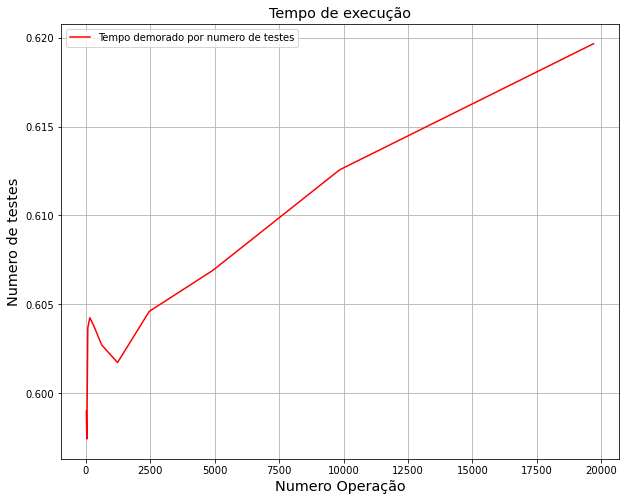

In [13]:
plt.figure(figsize=(10,8))

plt.grid(True)
plt.title("Tempo de execução", fontsize = 'x-large')
plt.ylabel("Numero de testes", fontsize = 'x-large')
plt.xlabel("Numero Operação", fontsize = 'x-large')


plt.plot(oi.iloc[0],oi.iloc[1], label="Tempo demorado por numero de testes", color='red')

plt.legend()
plt.show()